# Data Collection

In [1]:
#!pip install opendatasets

In [2]:
#import opendatasets as od

In [3]:
#od.download("https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset")

# Reading the Data

## Import the packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import r2_score

## Read the Train Dataset

In [5]:
train_data = pd.read_excel('./flight-fare-prediction-mh/Data_Train.xlsx')

In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
print(f'The Train Dataset contains {train_data.shape[0]} rows and {train_data.shape[1]} columns...')

The Train Dataset contains 10683 rows and 11 columns...


## Descriptive Statistics

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Feature Engineering and EDA

## Handling Missing Values

In [11]:
train_data.duplicated().sum()

220

In [12]:
train_data.drop_duplicates(inplace=True)

In [13]:
train_data.duplicated().sum()

0

In [14]:
print(f'Now, train_data Dataset contains {train_data.shape[0]} rows and {train_data.shape[1]} columns...')

Now, train_data Dataset contains 10463 rows and 11 columns...


In [15]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Now, 2 columns having missing data.
* 1. `Route` and `Total_Stops` columns has one missing value.

In [16]:
train_data.dropna(inplace = True)

In [17]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


## Handling Object Data

`Date_of_Journey`, `Dep_Time`, `Arrival_Time`, `Duration` are object datatype.
To derive numeric features on these, we use pandas `to_datetime` and `to_timedelta` method to convert object data type to int datatype.

### Date_of_Journey column

In [19]:
train_data['Date_of_Journey'].head().to_frame()

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019


In [20]:
# Extracting Day from Date_of-journey
train_data["journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [21]:
# Extracting Month from Date_of-journey
train_data["journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [22]:
# Extracting Year from Date_of-journey
train_data["journey_year"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [23]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


### Dep_Time column

In [25]:
train_data['Dep_Time'].head().to_frame()

,Dep_Time
0,22:20
1,05:50
2,09:25
3,18:05
4,16:50


In [26]:
# Extracting Hour from Dep_Time
train_data["dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

In [27]:
# Extracting Minutes from Dep_Time
train_data["dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [28]:
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


### Arrival_Time column

In [30]:
train_data['Arrival_Time'].head().to_frame()

,Arrival_Time
0,01:10 22 Mar
1,13:15
2,04:25 10 Jun
3,23:30
4,21:35


In [31]:
# Extracting Hour from Arrival_Time
train_data["arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

In [32]:
# Extracting Minutes from Arrival_Time
train_data["arrival_min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

In [33]:
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [34]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


### Duration column

In [35]:
train_data['Duration'].head().to_frame()

,Duration
0,2h 50m
1,7h 25m
2,19h
3,5h 25m
4,4h 45m


In [36]:
duration = pd.to_timedelta(train_data['Duration'])

In [37]:
# Extracting hours from Duration
train_data['duration_hour'] = duration.dt.components['hours']

In [38]:
# Extracting minutes from Duration
train_data['duration_minutes'] = duration.dt.components['minutes']

In [39]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [40]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Route             10462 non-null  object
 4   Total_Stops       10462 non-null  object
 5   Additional_Info   10462 non-null  object
 6   Price             10462 non-null  int64 
 7   journey_day       10462 non-null  int64 
 8   journey_month     10462 non-null  int64 
 9   journey_year      10462 non-null  int64 
 10  dep_hour          10462 non-null  int64 
 11  dep_min           10462 non-null  int64 
 12  arrival_hour      10462 non-null  int64 
 13  arrival_min       10462 non-null  int64 
 14  duration_hour     10462 non-null  int64 
 15  duration_minutes  10462 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 1.4+ MB


## Handling Categorical Data

`Airline`, `Source`, `Destination`, `Route`, `Total_Stops` and `Additional_Info` are object datatype.

### Airline column

In [42]:
Airline  = train_data["Airline"].value_counts()
Airline

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [43]:
Airline_morethan200 = Airline[Airline>200]
Airline_morethan200

Jet Airways          3700
IndiGo               2043
Air India            1694
Multiple carriers    1196
SpiceJet              815
Vistara               478
Air Asia              319
Name: Airline, dtype: int64

In [44]:
def handle_Airline(value):
    if(value in Airline_morethan200):
        return value
    else:
        return 'Others'

In [45]:
train_data['Airline'] = train_data['Airline'].apply(handle_Airline)

In [46]:
train_data['Airline'].value_counts()

Jet Airways          3700
IndiGo               2043
Air India            1694
Multiple carriers    1196
SpiceJet              815
Vistara               478
Air Asia              319
Others                217
Name: Airline, dtype: int64

### Source column

In [47]:
train_data['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### Destination column

In [48]:
train_data['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [49]:
train_data['Destination'] = train_data['Destination'].replace({'New Delhi':'Delhi'})

In [50]:
print('Modified Categories:')
print(train_data['Destination'].value_counts())

Modified Categories:
Cochin       4345
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


### Total_Stops column

In [51]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [52]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [53]:
train_data['Total_Stops'] = train_data['Total_Stops'].map({'non-stop':0,'1 stop':1,'nan':1, '2 stops':2,'3 stops':3,'4 stops':4})

In [54]:
train_data['Total_Stops'].value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

### Route and Additional_Info columns

In [55]:
train_data['Route'].nunique()

128

In [56]:
train_data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [57]:
train_data.drop('Route',axis=1,inplace=True)

`Route` and `Total_Stops` are similar. so drop the `Route` column

In [58]:
additional_info = train_data['Additional_Info'].value_counts()
additional_info

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [59]:
common_info = additional_info[additional_info>1500]
common_info

No info                        8182
In-flight meal not included    1926
Name: Additional_Info, dtype: int64

In [60]:
def handle_info(value):
    if(value in common_info):
        return value
    else:
        return 'Others'

In [61]:
train_data['Additional_Info'] = train_data['Additional_Info'].apply(handle_info)

In [62]:
train_data['Additional_Info'].value_counts()

No info                        8182
In-flight meal not included    1926
Others                          354
Name: Additional_Info, dtype: int64

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Total_Stops       10462 non-null  int64 
 4   Additional_Info   10462 non-null  object
 5   Price             10462 non-null  int64 
 6   journey_day       10462 non-null  int64 
 7   journey_month     10462 non-null  int64 
 8   journey_year      10462 non-null  int64 
 9   dep_hour          10462 non-null  int64 
 10  dep_min           10462 non-null  int64 
 11  arrival_hour      10462 non-null  int64 
 12  arrival_min       10462 non-null  int64 
 13  duration_hour     10462 non-null  int64 
 14  duration_minutes  10462 non-null  int64 
dtypes: int64(11), object(4)
memory usage: 1.3+ MB


## Data Visualizations

In [64]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'journey_day', 'journey_month', 'journey_year', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'duration_hour',
       'duration_minutes'],
      dtype='object')

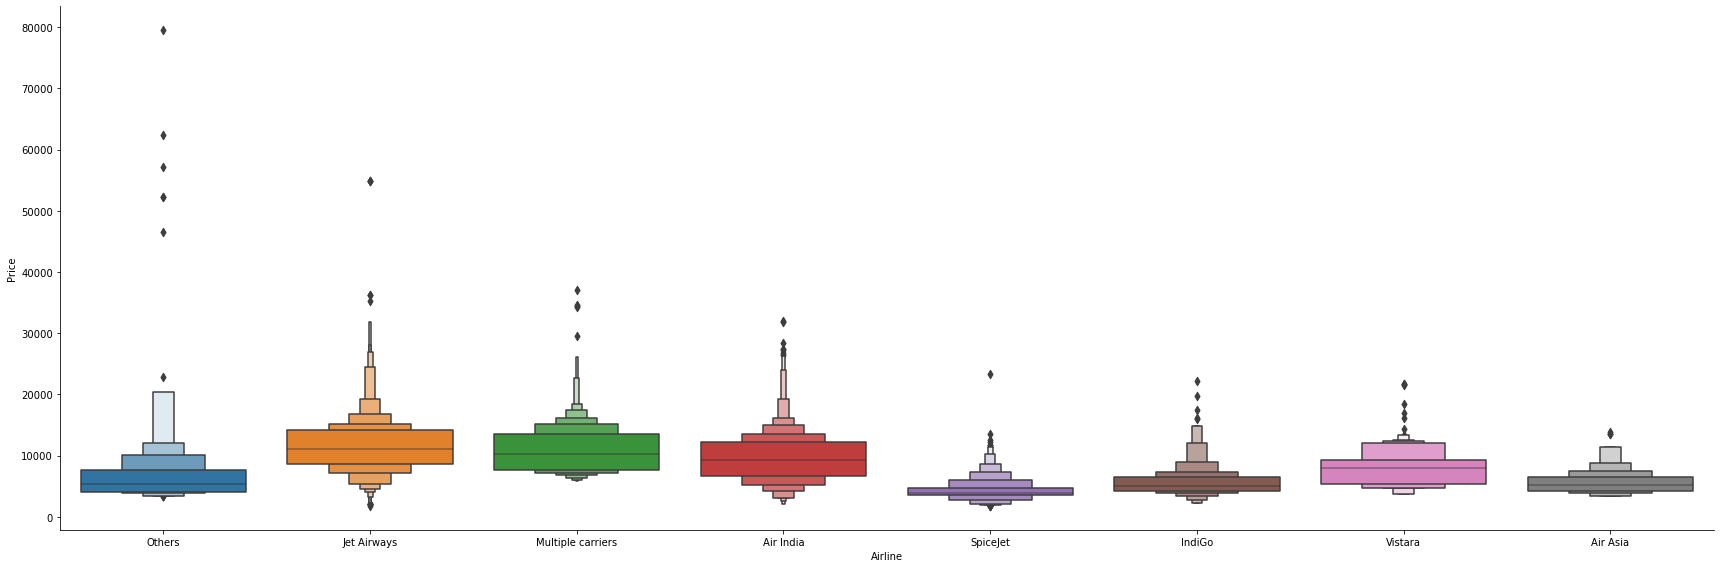

In [65]:
#Plotting Price vs Airline plot
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

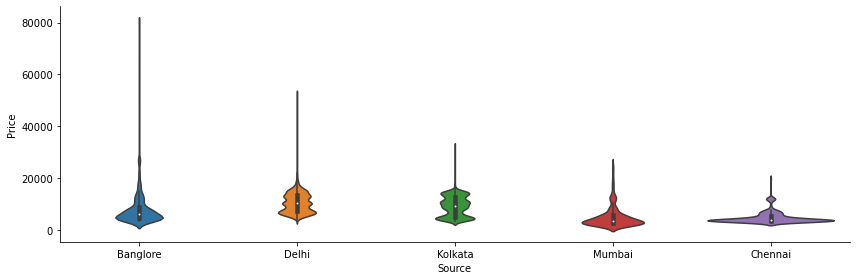

In [66]:
#plot Price vs Source
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

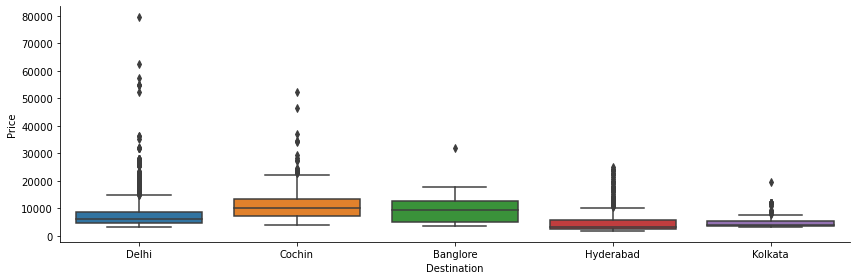

In [67]:
#plot Price vs Destination
sns.catplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

## Split the data into training and testing

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
train_df, test_df = train_test_split(train_data, test_size=0.33, random_state=0)

In [70]:
print('train_df.shape :', train_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (7009, 15)
test_df.shape : (3453, 15)


## Split the data into dependent and independent variables

In [71]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'journey_day', 'journey_month', 'journey_year', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'duration_hour',
       'duration_minutes'],
      dtype='object')

In [72]:
X_column= list(train_df.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14]])
y_column = 'Price'

In [73]:
X_column

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'journey_day',
 'journey_month',
 'journey_year',
 'dep_hour',
 'dep_min',
 'arrival_hour',
 'arrival_min',
 'duration_hour',
 'duration_minutes']

In [74]:
y_column

'Price'

In [75]:
x_train = train_df[X_column].copy()
y_train = train_df[y_column].copy()

In [76]:
x_test = test_df[X_column].copy()
y_test = test_df[y_column].copy()

In [77]:
x_train.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_day,journey_month,journey_year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_minutes
8464,Air India,Kolkata,Banglore,0,No info,18,3,2019,14,15,16,45,2,30
2037,Vistara,Kolkata,Banglore,1,No info,6,6,2019,7,10,9,5,1,55


In [78]:
y_train.head().to_frame()

,Price
8464,5170
2037,8452
1923,5644
5411,14151
10621,4804


In [79]:
print(x_train.shape, y_train.shape)

(7009, 14) (7009,)


In [80]:
print(x_test.shape, y_test.shape)

(3453, 14) (3453,)


## Numerical/categorical data

In [81]:
numeric_columns = x_train.select_dtypes(include=np.number).columns.tolist()

In [82]:
numeric_columns

['Total_Stops',
 'journey_day',
 'journey_month',
 'journey_year',
 'dep_hour',
 'dep_min',
 'arrival_hour',
 'arrival_min',
 'duration_hour',
 'duration_minutes']

In [83]:
categorical_columns = x_train.select_dtypes(include='object').columns.tolist()

In [84]:
categorical_columns

['Airline', 'Source', 'Destination', 'Additional_Info']

### Scale the independent variables

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [86]:
scaler.fit(train_data[numeric_columns])

MinMaxScaler()

In [87]:
x_train[numeric_columns] = scaler.transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])

In [88]:
x_train[numeric_columns].describe()

,Total_Stops,journey_day,journey_month,journey_year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_minutes
count,7009.000000,7009.000000,7009.000000,7009.0,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000,7009.000000
mean,0.201705,0.478692,0.565701,0.0,0.541589,0.440862,0.579466,0.448073,0.331673,0.512588
std,0.164669,0.327170,0.387608,0.0,0.250793,0.341842,0.298726,0.301413,0.272633,0.306523
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.192308,0.000000,0.0,0.304348,0.090909,0.347826,0.181818,0.086957,0.272727
50%,0.250000,0.423077,0.666667,0.0,0.478261,0.454545,0.565217,0.454545,0.260870,0.545455
75%,0.250000,0.769231,1.000000,0.0,0.782609,0.727273,0.826087,0.636364,0.521739,0.818182
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
x_train.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_day,journey_month,journey_year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_minutes
8464,Air India,Kolkata,Banglore,0.00,No info,0.653846,0.0,0.0,0.608696,0.272727,0.695652,0.818182,0.086957,0.545455
2037,Vistara,Kolkata,Banglore,0.25,No info,0.192308,1.0,0.0,0.304348,0.181818,0.391304,0.090909,0.043478,1.000000


In [90]:
x_test.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_day,journey_month,journey_year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_minutes
3691,Vistara,Kolkata,Banglore,0.25,No info,0.884615,0.0,0.0,0.304348,0.181818,0.956522,0.181818,0.652174,0.000000
7995,SpiceJet,Delhi,Cochin,0.25,No info,0.884615,1.0,0.0,0.652174,0.818182,0.956522,0.090909,0.260870,0.363636


### Encoding categorical values

In [91]:
x_train[categorical_columns].nunique()

Airline            8
Source             5
Destination        5
Additional_Info    3
dtype: int64

In [92]:
from sklearn.preprocessing import OneHotEncoder

In [93]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [94]:
train_data2 = train_data[categorical_columns]

In [95]:
encoder.fit(train_data2)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [96]:
encoder.categories_

[array(['Air Asia', 'Air India', 'IndiGo', 'Jet Airways',
        'Multiple carriers', 'Others', 'SpiceJet', 'Vistara'], dtype=object),
 array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object),
 array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata'],
       dtype=object),
 array(['In-flight meal not included', 'No info', 'Others'], dtype=object)]

In [97]:
encoded_column = list(encoder.get_feature_names_out(categorical_columns))
print(encoded_column)

['Airline_Air Asia', 'Airline_Air India', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Others', 'Airline_SpiceJet', 'Airline_Vistara', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Additional_Info_In-flight meal not included', 'Additional_Info_No info', 'Additional_Info_Others']


In [98]:
len(encoded_column)

21

In [99]:
x_train[encoded_column] = encoder.transform(x_train[categorical_columns])
x_test[encoded_column] = encoder.transform(x_test[categorical_columns])

In [100]:
x_train.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_day,journey_month,journey_year,dep_hour,dep_min,...,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_In-flight meal not included,Additional_Info_No info,Additional_Info_Others
8464,Air India,Kolkata,Banglore,0.00,No info,0.653846,0.0,0.0,0.608696,0.272727,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2037,Vistara,Kolkata,Banglore,0.25,No info,0.192308,1.0,0.0,0.304348,0.181818,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [101]:
x_train[numeric_columns + encoded_column]

,Total_Stops,journey_day,journey_month,journey_year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_minutes,...,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_In-flight meal not included,Additional_Info_No info,Additional_Info_Others
8464,0.00,0.653846,0.000000,0.0,0.608696,0.272727,0.695652,0.818182,0.086957,0.545455,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2037,0.25,0.192308,1.000000,0.0,0.304348,0.181818,0.391304,0.090909,0.043478,1.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1923,0.00,0.538462,1.000000,0.0,0.391304,0.636364,0.521739,0.181818,0.086957,0.636364,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5411,0.25,0.538462,0.666667,0.0,0.869565,0.454545,0.826087,0.181818,0.956522,0.818182,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10621,0.00,1.000000,1.000000,0.0,0.956522,0.272727,0.000000,0.909091,0.086957,0.636364,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9387,0.25,0.884615,0.000000,0.0,0.608696,0.636364,0.608696,0.636364,0.000000,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4910,0.25,0.769231,0.000000,0.0,0.652174,0.000000,0.043478,0.636364,0.434783,0.636364,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3291,0.00,0.884615,1.000000,0.0,0.739130,0.818182,0.869565,0.090909,0.086957,0.363636,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10034,0.25,0.884615,1.000000,0.0,0.695652,0.000000,0.826087,0.000000,0.130435,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [102]:
x_train_df = x_train[numeric_columns + encoded_column]

In [103]:
x_test_df = x_test[numeric_columns + encoded_column]

In [104]:
x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009 entries, 8464 to 2749
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Total_Stops                                  7009 non-null   float64
 1   journey_day                                  7009 non-null   float64
 2   journey_month                                7009 non-null   float64
 3   journey_year                                 7009 non-null   float64
 4   dep_hour                                     7009 non-null   float64
 5   dep_min                                      7009 non-null   float64
 6   arrival_hour                                 7009 non-null   float64
 7   arrival_min                                  7009 non-null   float64
 8   duration_hour                                7009 non-null   float64
 9   duration_minutes                             7009 non-null   float64
 1

# Model Building

## Gradient Boosting Regressor

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train_df, y_train)

GradientBoostingRegressor()

In [106]:
print('Model Performance on Training Set:', round(gbr.score(x_train_df, y_train)*100,2))
print('Model Performance on Test Set:', round(gbr.score(x_test_df, y_test)*100,2))

Model Performance on Training Set: 81.64
Model Performance on Test Set: 79.57


In [107]:
gbrpredict = gbr.predict(x_test_df)

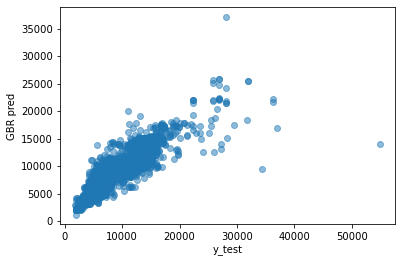

In [108]:
plt.scatter(y_test, gbrpredict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("GBR pred")
plt.show()

In [109]:
print('R2:',r2_score(y_test, gbrpredict))
print('R2 for train data:',r2_score(y_train, gbr.predict(x_train_df)))
print('MAE:', metrics.mean_absolute_error(y_test, gbrpredict))
print('MSE:', metrics.mean_squared_error(y_test, gbrpredict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbrpredict)))

R2: 0.7956885332040553
R2 for train data: 0.8163925746209784
MAE: 1274.028770612009
MSE: 4241385.831814309
RMSE: 2059.4625104172956


## Random Forest Regression

In [110]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train_df,y_train)

RandomForestRegressor()

In [111]:
rf_predict = rf.predict(x_test_df)

In [112]:
rf_predict

array([11907.21,  6297.75, 14302.41, ...,  6015.56,  7004.29,  6571.55])

In [113]:
print('Model Performance on Training Set:', round(rf.score(x_train_df, y_train)*100,2))
print('Model Performance on Test Set:', round(rf.score(x_test_df, y_test)*100,2))

Model Performance on Training Set: 98.21
Model Performance on Test Set: 86.99


In [114]:
print('R2:',r2_score(y_test, rf_predict))
print('R2 for train data:',r2_score(y_train, rf.predict(x_train_df)))
print('MAE:', metrics.mean_absolute_error(y_test, rf_predict))
print('MSE:', metrics.mean_squared_error(y_test, rf_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))

R2: 0.8699239507261722
R2 for train data: 0.9821350803136156
MAE: 724.1171483320232
MSE: 2700302.244902408
RMSE: 1643.2596401367643


In [115]:
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, rf_predict))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y_train), '\nMin Value: ', min(y_train))

Normalized RMSE  0.03
Max Value:  79512 
Min Value:  1759


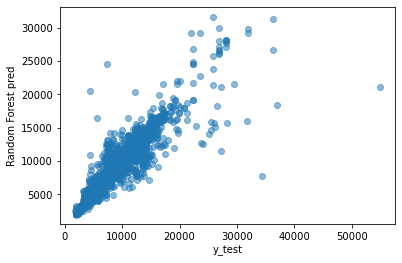

In [116]:
plt.scatter(y_test, rf_predict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("Random Forest pred")
plt.show()

### Hyperparameter Tuning

In [117]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [119]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [120]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 5, cv = 10, 
                               verbose=2, random_state=42, n_jobs = -1)

In [121]:
rf_random.fit(x_train_df,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [122]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

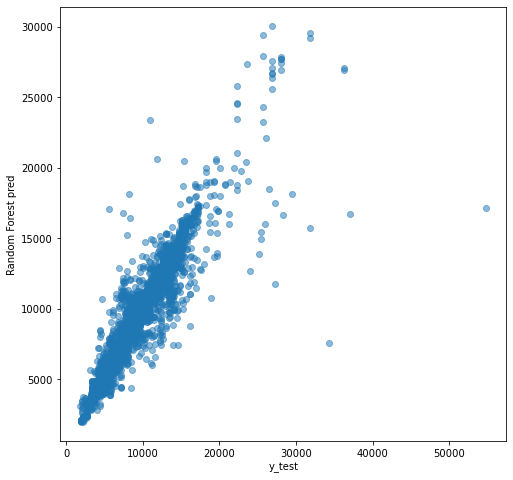

In [123]:
predict= rf_random.predict(x_test_df)
plt.figure(figsize = (8,8))
plt.scatter(y_test, predict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("Random Forest pred")
plt.show()

In [124]:
print('R2 value: ', round(metrics.r2_score(y_test, predict),2))
print('R2 for train data:',r2_score(y_train, rf_random.predict(x_train_df)))
print('RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, predict)),2))
print('Normalized RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, predict))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y_test), '\nMin Value: ', min(y_test))

R2 value:  0.86
R2 for train data: 0.8967308122895814
RMSE:  1697.8
Normalized RMSE:  0.03
Max Value:  54826 
Min Value:  1840


## Making predictions for new input

In [126]:
x_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_day,journey_month,journey_year,dep_hour,dep_min,...,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_In-flight meal not included,Additional_Info_No info,Additional_Info_Others
8464,Air India,Kolkata,Banglore,0.00,No info,0.653846,0.000000,0.0,0.608696,0.272727,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2037,Vistara,Kolkata,Banglore,0.25,No info,0.192308,1.000000,0.0,0.304348,0.181818,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1923,IndiGo,Kolkata,Banglore,0.00,No info,0.538462,1.000000,0.0,0.391304,0.636364,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5411,Jet Airways,Kolkata,Banglore,0.25,No info,0.538462,0.666667,0.0,0.869565,0.454545,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10621,IndiGo,Kolkata,Banglore,0.00,No info,1.000000,1.000000,0.0,0.956522,0.272727,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [127]:
x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009 entries, 8464 to 2749
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Total_Stops                                  7009 non-null   float64
 1   journey_day                                  7009 non-null   float64
 2   journey_month                                7009 non-null   float64
 3   journey_year                                 7009 non-null   float64
 4   dep_hour                                     7009 non-null   float64
 5   dep_min                                      7009 non-null   float64
 6   arrival_hour                                 7009 non-null   float64
 7   arrival_min                                  7009 non-null   float64
 8   duration_hour                                7009 non-null   float64
 9   duration_minutes                             7009 non-null   float64
 1

In [128]:
new_input = {
    'Airline': 'IndiGo', 
    'Source': 'Kolkata',
    'Destination': 'Cochin', 
    'Total_Stops': 1, 
    'Additional_Info': 'In-flight meal not included',
    'journey_day': 13, 
    'journey_month': 11,
    'journey_year': 2022,
    'dep_hour': 18,
    'dep_min': 26,
    'arrival_hour': 20,
    'arrival_min': 28,
    'duration_hour': 2,
    'duration_minutes': 2
}

In [129]:
input_df = pd.DataFrame([new_input])

In [130]:
input_df

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_day,journey_month,journey_year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_minutes
0,IndiGo,Kolkata,Cochin,1,In-flight meal not included,13,11,2022,18,26,20,28,2,2


In [131]:
input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])
input_df[encoded_column] = encoder.transform(input_df[categorical_columns])

In [132]:
input_df

,Airline,Source,Destination,Total_Stops,Additional_Info,journey_day,journey_month,journey_year,dep_hour,dep_min,...,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_In-flight meal not included,Additional_Info_No info,Additional_Info_Others
0,IndiGo,Kolkata,Cochin,0.25,In-flight meal not included,0.461538,2.666667,3.0,0.782609,0.472727,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [133]:
x_input_df = input_df[numeric_columns + encoded_column]

In [134]:
x_input_df

,Total_Stops,journey_day,journey_month,journey_year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_minutes,...,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_In-flight meal not included,Additional_Info_No info,Additional_Info_Others
0,0.25,0.461538,2.666667,3.0,0.782609,0.472727,0.869565,0.509091,0.086957,0.036364,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [135]:
prediction = rf_random.predict(x_input_df)[0]

In [136]:
prediction

4483.000274643145

## Save the model

In [137]:
import pickle
pickle.dump(rf_random,open('random_forest_model.pkl','wb'))
model=pickle.load(open('random_forest_model.pkl','rb'))

In [138]:
import joblib

In [139]:
joblib.dump(numeric_columns, "numeric_columns.pkl")

['numeric_columns.pkl']

In [140]:
joblib.dump(categorical_columns, "categorical_columns.pkl")

['categorical_columns.pkl']

In [142]:
joblib.dump(encoded_column, "encoded_column.pkl")

['encoded_column.pkl']

In [143]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [144]:
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']

## Prediction on Unseen data

In [146]:
import pickle
path = 'random_forest_model.pkl'
model = open(path,'rb')
rf_model = pickle.load(model)

In [147]:
test_data = pd.read_excel('Test.xlsx')

In [148]:
test_data.head()

,Total_Stops,journey_day,journey_month,journey_year,dep_hour,dep_min,arrival_hour,arrival_min,duration_hour,duration_minutes,...,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_In-flight meal not included,Additional_Info_No info,Additional_Info_Others
0,0.25,0.192308,1.000000,0,0.739130,0.545455,0.173913,0.454545,0.434783,1.000000,...,0,0,0,1,0,0,0,0,1,0
1,0.25,0.423077,0.666667,0,0.260870,0.363636,0.434783,0.363636,0.173913,0.000000,...,1,0,1,0,0,0,0,0,1,0
2,0.25,0.769231,0.666667,0,0.826087,0.272727,0.826087,0.000000,1.000000,0.818182,...,0,0,0,1,0,0,0,1,0,0
3,0.25,0.769231,0.666667,0,0.347826,0.000000,0.913043,0.000000,0.565217,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,0.00,0.884615,1.000000,0,1.000000,1.000000,0.086957,0.818182,0.086957,0.909091,...,0,0,0,0,1,0,0,0,1,0


In [150]:
pred = rf_model.predict(test_data)

In [152]:
prediction = pd.DataFrame({'Predicted Value':pred})

In [153]:
prediction

,Predicted Value
0,14621.052591
1,4221.027905
2,12844.305216
3,10683.344266
4,3864.623898
...,...
2640,9926.233987
2641,5740.161962
2642,16048.768669
2643,14285.338801


In [156]:
prediction.to_csv('Submission.csv')